## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import pandas as pd
import tensorflow as tf
from datetime import datetime, timedelta


import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
credit_card_df = pd.read_csv("credit_card_data.csv")
credit_card_df.head()

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008806,0.0,C,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2
1,5008808,0.0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1
2,5008810,0.0,C,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1
3,5008811,0.0,C,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1
4,5008815,0.0,0,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,Accountants,2


In [3]:
credit_card_df['STATUS'].replace({"0": 1, '1': 1, "2": 1, "3": 1, "4": 1, "5": 1, "C": 0, "X": 0}, inplace=True)
credit_card_df

C:\Users\Jasper\AppData\Local\Temp\ipykernel_17732\2476461539.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit_card_df['STATUS'].replace({"0": 1, '1': 1, "2": 1, "3": 1, "4": 1, "5": 1, "C": 0, "X": 0}, inplace=True)
C:\Users\Jasper\AppData\Local\Temp\ipykernel_17732\2476461539.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option(

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008806,0.0,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2
1,5008808,0.0,1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1
2,5008810,0.0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1
3,5008811,0.0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1
4,5008815,0.0,1,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,Accountants,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17038,5149828,0.0,1,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,Managers,2
17039,5149834,0.0,0,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2
17040,5149838,0.0,0,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2
17041,5150049,0.0,1,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,Sales staff,2


In [4]:
# Define the current date
current_date = datetime.now()

# Convert the negative integers to birth dates
credit_card_df['DAYS_CONVERTED'] = credit_card_df['DAYS_BIRTH'].apply(lambda x: current_date + timedelta(days=x))

# Calculate the age in years
credit_card_df['AGE'] = credit_card_df['DAYS_CONVERTED'].apply(lambda x: (current_date - x).days // 365)

# Drop the intermediate birth_date_converted column if not needed
credit_card_df

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_CONVERTED,AGE
0,5008806,0.0,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2,1965-08-05 21:00:33.431705,58
1,5008808,0.0,1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,1972-01-25 21:00:33.431705,52
2,5008810,0.0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,1972-01-25 21:00:33.431705,52
3,5008811,0.0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,1972-01-25 21:00:33.431705,52
4,5008815,0.0,1,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,Accountants,2,1978-03-12 21:00:33.431705,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17038,5149828,0.0,1,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,Managers,2,1976-11-21 21:00:33.431705,47
17039,5149834,0.0,0,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2,1990-06-22 21:00:33.431705,33
17040,5149838,0.0,0,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2,1990-06-22 21:00:33.431705,33
17041,5150049,0.0,1,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,Sales staff,2,1975-03-22 21:00:33.431705,49


In [5]:
# Define the current date
current_date = datetime.now()

# Convert the negative integers to birth dates
credit_card_df['EMP_CONVERTED'] = credit_card_df['DAYS_EMPLOYED'].apply(lambda x: current_date + timedelta(days=x))

# Calculate the age in years
credit_card_df['YEARS_EXPERIENCE'] = credit_card_df['EMP_CONVERTED'].apply(lambda x: (current_date - x).days // 365)

# Drop the intermediate birth_date_converted column if not needed
credit_card_df

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,DAYS_CONVERTED,AGE,EMP_CONVERTED,YEARS_EXPERIENCE
0,5008806,0.0,0,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,Security staff,2,1965-08-05 21:00:33.431705,58,2021-04-13 21:00:36.659164,3
1,5008808,0.0,1,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,1972-01-25 21:00:33.431705,52,2016-01-13 21:00:36.659164,8
2,5008810,0.0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,1972-01-25 21:00:33.431705,52,2016-01-13 21:00:36.659164,8
3,5008811,0.0,0,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,Sales staff,1,1972-01-25 21:00:33.431705,52,2016-01-13 21:00:36.659164,8
4,5008815,0.0,1,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,Accountants,2,1978-03-12 21:00:33.431705,46,2022-04-13 21:00:36.659164,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17038,5149828,0.0,1,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,Managers,2,1976-11-21 21:00:33.431705,47,2017-10-05 21:00:36.659164,6
17039,5149834,0.0,0,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2,1990-06-22 21:00:33.431705,33,2020-10-04 21:00:36.659164,3
17040,5149838,0.0,0,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,Medicine staff,2,1990-06-22 21:00:33.431705,33,2020-10-04 21:00:36.659164,3
17041,5150049,0.0,1,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,Sales staff,2,1975-03-22 21:00:33.431705,49,2022-08-05 21:00:36.659164,1


In [6]:
categorical = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE' ]
numerical = ['AMT_INCOME_TOTAL', 'AGE', 'YEARS_EXPERIENCE']
target = ['STATUS']
cols = categorical + numerical + target
cols_to_drop = credit_card_df.columns[~credit_card_df.columns.isin(cols)]
cols_to_drop

Index(['ID', 'MONTHS_BALANCE', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'CNT_FAM_MEMBERS', 'DAYS_CONVERTED', 'EMP_CONVERTED'],
      dtype='object')

In [7]:
credit_card_df.columns[~credit_card_df.columns.isin(categorical)]

Index(['ID', 'MONTHS_BALANCE', 'STATUS', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'DAYS_CONVERTED',
       'AGE', 'EMP_CONVERTED', 'YEARS_EXPERIENCE'],
      dtype='object')

In [8]:
credit_card_df_reduced = credit_card_df.drop(columns=cols_to_drop)
categorical_df = credit_card_df_reduced[categorical]
numerical_df = credit_card_df_reduced[numerical]

In [9]:
data_mic = pd.concat([numerical_df, categorical_df], axis=1)
data_mic

,AMT_INCOME_TOTAL,AGE,YEARS_EXPERIENCE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,112500.0,58,3,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Security staff
1,270000.0,52,8,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
2,270000.0,52,8,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
3,270000.0,52,8,F,N,Y,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,Sales staff
4,270000.0,46,2,M,Y,Y,Working,Higher education,Married,House / apartment,Accountants
...,...,...,...,...,...,...,...,...,...,...,...
17038,315000.0,47,6,M,Y,Y,Working,Secondary / secondary special,Married,House / apartment,Managers
17039,157500.0,33,3,F,N,Y,Commercial associate,Higher education,Married,House / apartment,Medicine staff
17040,157500.0,33,3,F,N,Y,Pensioner,Higher education,Married,House / apartment,Medicine staff
17041,283500.0,49,1,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Sales staff


In [10]:
target_col = credit_card_df_reduced[target]
target_col['STATUS'] = target_col['STATUS'].astype(int)
target_col.dtypes

C:\Users\Jasper\AppData\Local\Temp\ipykernel_17732\3490206290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_col['STATUS'] = target_col['STATUS'].astype(int)


STATUS    int32
dtype: object

In [11]:
label_enc = LabelEncoder()

importances_list = {}
for column in data_mic.columns:
    X = label_enc.fit_transform(data_mic[column]).reshape(-1,1)
    y = label_enc.fit_transform(target_col['STATUS'])
    importances = mutual_info_classif(X, y)
    importances_list[column] = importances[0]

In [12]:
print(importances_list)

{'AMT_INCOME_TOTAL': 0.00786744220094171, 'AGE': 0.006223035256917031, 'YEARS_EXPERIENCE': 0.001631263196833821, 'CODE_GENDER': 0.00576817693458187, 'FLAG_OWN_CAR': 0, 'FLAG_OWN_REALTY': 0.0019924824340722402, 'NAME_INCOME_TYPE': 0, 'NAME_EDUCATION_TYPE': 0, 'NAME_FAMILY_STATUS': 0, 'NAME_HOUSING_TYPE': 0.00455787669026364, 'OCCUPATION_TYPE': 0.0037234246532755755}


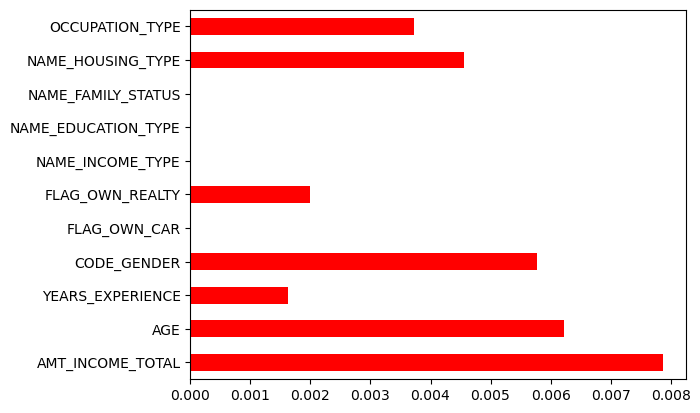

In [13]:
importances_list_df = pd.Series(importances_list)
importances_list_df.plot(kind='barh', color='red')
plt.show()

In [14]:
#encoding cat cols
categorical_df_encoded = pd.get_dummies(categorical_df, dtype=int)
categorical_df_encoded

,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17038,0,1,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
17039,1,0,1,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17040,1,0,1,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
17041,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [15]:
data_clean = pd.concat([numerical_df, categorical_df_encoded], axis=1)
data_clean

,AMT_INCOME_TOTAL,AGE,YEARS_EXPERIENCE,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,...,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff
0,112500.0,58,3,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,270000.0,52,8,1,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
2,270000.0,52,8,1,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
3,270000.0,52,8,1,0,1,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
4,270000.0,46,2,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17038,315000.0,47,6,0,1,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
17039,157500.0,33,3,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
17040,157500.0,33,3,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
17041,283500.0,49,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [16]:
data_clean.to_csv('Resources/CleanedDataset.csv', index='False')

In [17]:
target_col.to_csv('Resources/Status.csv', index=False)

In [18]:
X = data_clean
y = target_col

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)

In [19]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = X_train.shape[1]
hidden_nodes_layer1 =  48
hidden_nodes_layer2 = 28
hidden_nodes_layer3 = 28


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))



# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

c:\Users\Jasper\anaconda3\envs\monash\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 48)             │         2,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 28)             │         1,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │           812 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,565 (17.83 KB)

 Trainable params: 4,565 (17.83 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [21]:
scaler = RobustScaler
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

AttributeError: 'DataFrame' object has no attribute '_validate_params'

In [22]:
X_train_scaled = X_train_scaled.astype(np.float32)
y_train = y_train.astype(np.float32)
X_test_scaled = X_test_scaled.astype(np.float32)
y_test = y_test.astype(np.float32)

NameError: name 'X_train_scaled' is not defined

In [ ]:
fit_model = nn.fit(X_train,y_train,epochs=10)

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")